In [29]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import dgl
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from dgl.nn.pytorch import GraphConv
from graphviz import Digraph
import optuna

def create_stride_file(file_name, edge_functions):
    """
    Create and render a security threat graph using Graphviz.
    
    Args:
    - file_name (str): The name of the output file.
    - edge_functions (list): List of functions to add edges for different parts of the application.
    
    Returns:
    - nodes (dict): Dictionary of nodes with their feature vectors.
    - edges (list): List of edges with their concatenated feature vectors.
    - edge_features_dict (dict): Dictionary of edge names and their feature vectors.
    """
    dot = Digraph()
    dot.attr('node', fontname='bold', fontweight='2')
    dot.attr('edge', fontname='bold')
    dot.attr('node', fontname='bold', penwidth='2')
    dot.attr('edge', fontname='bold', penwidth='2')
    
    # Define Nodes with their attributes
    nodes = {
        'login': [0, 0, 0, 0, 0],
        'admin': [1, 1, 0, 0, 0],
        'In\n OMS Directory': [0, 0, 0, 1, 0],
        'In\n Customer DB': [0, 0, 0, 0, 1],
        'In\n Product DB': [0, 0, 0, 0, 1],
        'Disclosure\nof Sensitive\n Data': [1, 1, 1, 1, 1],
        'Render\n Malicious\n Advertisement': [0, 0, 0, 1, 1],
        'Flood Partial\n Request\n Headers': [0, 0, 1, 1, 0],
        'Website\n Unavailable': [0, 0, 0, 1, 0],
        'home': [1, 0, 0, 0, 0],
        'Manipulate\n Control\n Syntax': [1, 0, 0, 1, 1],
        'Steal\n Session\n Cookie': [1, 0, 1, 0, 0],
        'Usurp\n Access to\n IMS SMB \n Protocol': [1, 0, 1, 1, 0],
        'Target\n Unpatched\n Endpoints': [0, 0, 1, 0, 0],
        'Install\nRootKit': [0, 1, 0, 1, 0],
        'Disable\nAntivirus': [1, 1, 1, 1, 0],
        'Overwrite\nMaster Boot\nRecord': [0, 0, 0, 1, 0],
        'Flood IMS\n with Request': [0, 0, 1, 1, 0],
        'In IMS ': [1, 0, 0, 1, 0],
        'Dynamic\n Memory\n Allocation': [0, 0, 0, 1, 0],
        'Frame Pointer\n with Overwritten Memory': [0, 0, 0, 1, 0],
        'Enter\n Kernel Space': [0, 1, 0, 1, 0],
        'Access a\n Known UNC\nShare': [1, 1, 0, 1, 0],
        'Create User\n Account with\n Full Privilege': [0, 1, 0, 1, 0],
        'Search Local\n Network with\n using\nwmic.exe': [0, 1, 1, 1, 0],
        'Product\nList': [1, 0, 0, 0, 0],
        'Intercept Protocol\n Trace Response': [0, 1, 1, 1, 0],
        'Access\nOMS': [1, 1, 0, 1, 0],
        'Register a\n Rouge Domain\n Controller (DC)': [1, 1, 1, 1, 0],
        'Malicious\nEmail\nin Employee\'s Email': [1, 1, 1, 1, 0],
        'Access\n VPN\n Network': [1, 1, 1, 0, 0],
        'Stolen\n Session\n Token': [0, 1, 1, 1, 0],
        'Reuse\n SSL\n Token': [1, 1, 1, 1, 0],
        'Spoofing\n Legitimate\n User': [1, 0, 0, 0, 0],
        'Client Side\n Malicious Browser\n Extensions': [1, 0, 0, 0, 0],
        'Scrape\n Personal\n Data': [1, 1, 1, 0, 1],
        'Product\nPage': [1, 0, 0, 0, 0],
        'Comment Creation Race': [0, 0, 0, 1, 0],
        'Store Malicious \nScript in\n Database': [1, 1, 0, 0, 1],
        'Access Unwhitelisted Domains': [0, 0, 0, 1, 0],
        'Cookies sent to\n External Web\n Server': [1, 1, 0, 1, 0],
        'i.Leverage Malicious\n RDP Server\nii.An RDP Relay\niii. Weaponized RDP\n Connection File': [1, 0, 1, 1, 0],
        'In\n Supplier\nDesktop': [1, 1, 0, 0, 0],
        'Access System\nFiles and Binaries': [0, 1, 0, 0, 0],
        'Connect Foreign\n Network Devices': [1, 1, 0, 0, 0],
        'Dwmcore.dll': [0, 1, 0, 1, 0],
        'Replicate \nBrowser \nSession': [1, 1, 1, 0, 0],
        'Heap-Based\n Buffer Overflow': [1, 1, 0, 1, 0],
        'Log\n Tampering': [0, 1, 1, 1, 1],
        'User\nImpersonation': [1, 1, 0, 1, 1],
        'Lack of \n Accountability': [0, 0, 0, 0, 0],
        'Cart List': [1, 0, 0, 0, 0],
        'Manipulate DOM Tree': [0, 0, 0, 1, 0],
        'Modify Cart Transactions': [0, 0, 0, 1, 0],
        'Unencrypted Cookies': [0, 0, 0, 1, 0],
        'MiTM Attack': [0, 0, 0, 1, 0],
        'Order Confirmation': [0, 0, 0, 1, 0],
        'Order Out of Inventory': [0, 0, 0, 1, 0],
        'Rouge alert() Dialogue': [0, 0, 0, 1, 0],
        'Access Customer Database': [0, 0, 0, 1, 1],
        'Steal Payment Methods':[0, 0, 0, 1, 1],
        'Inject Scripts to Capture Keystrokes':[0, 0, 0, 1, 1]
    }

    for node, attrs in nodes.items(): # Iterates over nodes dictionary (nodes) to extract node name and attributes
        dot.node(node, f'{node}\n{attrs}') # Creates Nodes in the graph with name and attributes

    edges = [] # Initialized empty array
    edge_features_dict = {} # Initialized empty dictionary

    # Define edges based on functions    
    for edge_function in edge_functions:
        edge_function(dot, edges, nodes, edge_features_dict)

    return nodes, edges, edge_features_dict

# Define edge creation functions
def Login(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('login', 'admin', 'No Restriction of \nExcessive Authentication\n Attempts'),
        ('login', 'Flood Partial\n Request\n Headers', 'Multiple Connections\n to Target Server'),
        ('Flood Partial\n Request\n Headers', 'Website\n Unavailable', 'Unable to Release \nOpen Partial Connections'),
        ('admin', 'In\n OMS Directory', 'Fail To Sanitize\n Incoming Paths'),
        ('admin', 'In\n Customer DB', 'Improper Interaction\n Frequency'),
        ('admin', 'In\n Product DB', 'Password Aging with\n Long Expiration'),
        ('In\n OMS Directory', 'Disclosure\nof Sensitive\n Data', 'Exposure of \nSensitive Information'),
        ('In\n Customer DB', 'Disclosure\nof Sensitive\n Data', 'SQL Injection'),
        ('In\n Product DB', 'Render\n Malicious\n Advertisement', 'Stored\n Cross-Site-Scripting'),
        ('Render\n Malicious\n Advertisement', 'Disclosure\nof Sensitive\n Data', 'Exposure of\n Sensitive Information')
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

def Home(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('login', 'home', ''),
        ('home', 'Manipulate\n Control\n Syntax', 'Improper\n Encoding'),
        ('home', 'Steal\n Session\n Cookie', 'Incorrect Permission\n for Critical Resource'),
        ('Manipulate\n Control\n Syntax', 'Usurp\n Access to\n IMS SMB \n Protocol', 'Misuse\n Directives'),
        ('Usurp\n Access to\n IMS SMB \n Protocol', 'Disclosure\nof Sensitive\n Data', 'Exposure of Resource\n to Wrong Sphere'),
        ('Usurp\n Access to\n IMS SMB \n Protocol', 'Target\n Unpatched\n Endpoints', 'Enumerated\n Connected\n Endpoints\n (Scan TCP Port 445)'),
        ('Target\n Unpatched\n Endpoints', 'Install\nRootKit', 'Exploit Outdated\n Software'),
        ('Install\nRootKit', 'Overwrite\nMaster Boot\nRecord', 'Persistence and\n System Control'),
        ('Steal\n Session\n Cookie', 'Disclosure\nof Sensitive\n Data', 'Insecure\n Cookies'),
        ('home', 'Flood IMS\n with Request', 'Use of Resources\n without Throttling'),
        ('Flood IMS\n with Request', 'Website\n Unavailable', 'Uncontrollable Resource\n Consumption'),
        ('home', 'In IMS ', 'Server Side\n Include Injection'),
        ('In IMS ', 'Dynamic\n Memory\n Allocation', 'Uncontrolled Resource\n Consumption'),
        ('Dynamic\n Memory\n Allocation', 'Frame Pointer\n with Overwritten Memory', 'Classic Buffer\n Overflow'),
        ('In IMS ', 'Access a\n Known UNC\nShare', 'Absolute Path\n Traversal'),
        ('Access a\n Known UNC\nShare', 'Create User\n Account with\n Full Privilege', 'Exploit MS15-011\n Vulnerability'),
        ('Create User\n Account with\n Full Privilege', 'Search Local\n Network with\n using\nwmic.exe', 'Perform Network\n Reconnaissance'),
        ('Search Local\n Network with\n using\nwmic.exe', 'Target\n Unpatched\n Endpoints', 'Analyze Software\n Versions'),
        ('Install\nRootKit', 'Disable\nAntivirus', 'Defense Evasion'),
        ('Frame Pointer\n with Overwritten Memory','Enter\n Kernel Space','Untrusted Pointer\n dereference '),
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

def ProductList(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('home', 'Product\nList', ''),
        ('Product\nList', 'Intercept Protocol\n Trace Response', 'Enabled Protocol\n Trace Method'),
        ('Product\nList', 'Access\nOMS', 'Unmaintained \nThird Party\n Components'),
        ('Access\nOMS', 'Register a\n Rouge Domain\n Controller (DC)', 'DCShadow\n Technique'),
        ('Register a\n Rouge Domain\n Controller (DC)', 'Create User\n Account with\n Full Privilege', 'Mimic Domain\n Controller'),
        ('Register a\n Rouge Domain\n Controller (DC)', 'Malicious\nEmail\nin Employee\'s Email', 'Usurp Internal\n Email Accounts'),
        ('Malicious\nEmail\nin Employee\'s Email', 'Access\n VPN\n Network', 'Exposed\n Credentials'),
        ('Access\nOMS', 'Stolen\n Session\n Token', 'Poorly Protected\n Identity Token'),
        ('Stolen\n Session\n Token', 'Reuse\n SSL\n Token', 'Session Resumption\n Techniques'),
        ('Reuse\n SSL\n Token', 'Spoofing\n Legitimate\n User', 'Reuse Valid\n Session ID'),
        ('Client Side\n Malicious Browser\n Extensions', 'Stolen\n Session\n Token', 'Misuse HTTP\n Header'),
        ('Client Side\n Malicious Browser\n Extensions', 'Scrape\n Personal\n Data', 'Missing Encryption\n of Sensitive Data'),
        ('Scrape\n Personal\n Data', 'Spoofing\n Legitimate\n User', 'Clear Text Transmission\n of Sensitive Data'),
        ('Access\n VPN\n Network', 'Spoofing\n Legitimate\n User', 'Broad Access\n to Sensitive Networks')
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

def ProductPage(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('Product\nList', 'Product\nPage', ''),
        ('Product\nPage','Comment Creation Race', "Multiple Comment\n Creation Requests"),
        ('Product\nPage','i.Leverage Malicious\n RDP Server\nii.An RDP Relay\niii. Weaponized RDP\n Connection File', "Rogue RDP"),
        ('i.Leverage Malicious\n RDP Server\nii.An RDP Relay\niii. Weaponized RDP\n Connection File', 'Access System\nFiles and Binaries', 'Server Misconfiguration\n Allows RDP Access'),
        ('Access System\nFiles and Binaries', 'In\n Supplier\nDesktop', 'Unrestricted File\n Access'),
        ('In\n Supplier\nDesktop', 'Connect Foreign\n Network Devices', 'Lack of Control\n on Peripheral Devices'),
        ('Connect Foreign\n Network Devices', 'Lack of \n Accountability', 'Unpatched\n Windows OS'),
        ('In\n Supplier\nDesktop', 'Dwmcore.dll', 'Target OS File\n Vulnerability'),
        ('Dwmcore.dll','Heap-Based\n Buffer Overflow', 'Boundary Error'),
        ('Heap-Based\n Buffer Overflow', 'Log\n Tampering', 'Modify or\n Delete Logs'),
        ('Log\n Tampering', 'Lack of \n Accountability', 'Avoid Detection'),
        ('Product\nPage', 'Store Malicious \nScript in\n Database', 'Stored\n XSS'),
        ('Store Malicious \nScript in\n Database', 'Cookies sent to\n External Web\n Server', 'Client-Side\nExploitation'),
        ('Cookies sent to\n External Web\n Server', 'Replicate \nBrowser \nSession', 'Session Management\nVulnerability'),
        ('Replicate \nBrowser \nSession', 'User\nImpersonation', 'Reuse Valid\n Session ID'),
        ('User\nImpersonation', 'Lack of \n Accountability', 'Avoid Detection'),
        ('Store Malicious \nScript in\n Database','Access Unwhitelisted Domains', 'Missing Restriction\non Target URL')
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

def CartList(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('Product\nPage','Cart List', ''),
        ('Cart List', 'Manipulate DOM Tree', 'XSS\n Vulnerability'),
        ('Manipulate DOM Tree','Modify Cart Transactions', 'Script Injection\n through DOM'),
        ('Cart List','Unencrypted Cookies', 'No Hash\n Check'),
        ('Unencrypted Cookies','MiTM Attack', 'Cookies sent\n over Browser'),
        ('MiTM Attack','Modify Cart Transactions', 'Unencrypted\n Communication')
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

def OrderConfirmation(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('Cart List','Order Confirmation', ''),
        ('Order Confirmation','Order Out of Inventory', 'Simultaneous Purchase\n Actions'),
        ('Order Confirmation','Rouge alert() Dialogue', 'Lack of User Input\n Validation'),
        ('Rouge alert() Dialogue','Inject Scripts to Capture Keystrokes', 'Found XSS\n Vulnerability'),
        ('Inject Scripts to Capture Keystrokes','Steal Payment Methods', 'Poor Data\n Protection'),
        ('Order Confirmation','Access Customer Database', 'Network Access to\n Order Confirmation\n page'),
        ('Access Customer Database','Steal Payment Methods', 'Insecure\n Storage of\n Credentials')
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

# Create the attack graph and extract nodes and edges
dot = Digraph()
nodes, edges, edge_features_dict = create_stride_file('AttackGraph', [Login, Home, ProductList, ProductPage, CartList, OrderConfirmation])

# Render the graph to a PNG file
dot.attr(size='20,20')  # Set the size of the output image
for node, attrs in nodes.items():
    dot.node(node, f'{node}\n{attrs}')

for edge in edges:
    dot.edge(*edge)

# Save the graph
dot.render('AttackGraph', format='png')


'AttackGraph.png'

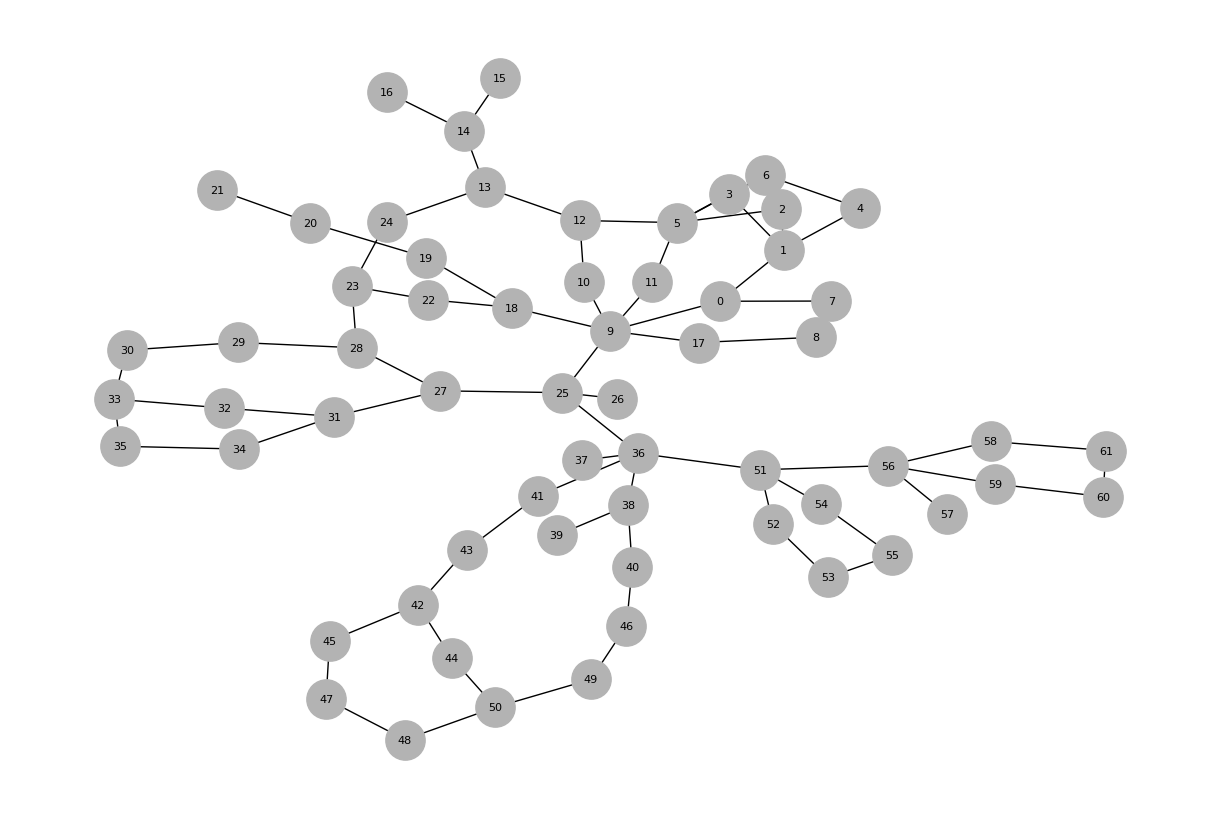

In [30]:

# Function to create DGL graph and add nodes and edges
def create_dgl_graph(nodes, edges):
    g = dgl.graph(([], []))  # Initialize an empty DGL graph
    g.add_nodes(len(nodes))  # Add nodes to the graph

   # Add edges to the graph
    edge_index = [(list(nodes.keys()).index(src), list(nodes.keys()).index(dst)) for src, dst, _ in edges]
    src, dst = zip(*edge_index)
    g.add_edges(src, dst)

   # Add node features
    node_features = torch.tensor(list(nodes.values()), dtype=torch.float32)
    g.ndata['feat'] = node_features

   # Add edge features
    edge_features = torch.tensor([nodes[src] + nodes[dst] for src, dst, _ in edges], dtype=torch.float32)
    g.edata['feat'] = edge_features

    return g

g = create_dgl_graph(nodes, edges)                   # Visualize the graph
nx_g = g.to_networkx().to_undirected()

# Compute the Kamada-Kawai layout with precomputed distances
pos = nx.kamada_kawai_layout(nx_g)

plt.figure(figsize=(12, 8))
nx.draw(nx_g, pos, with_labels=True, node_color=[[0.7, 0.7, 0.7]], font_size=8,node_size=800)
plt.show()


In [31]:

import random

def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

# Set the seed
seed = 42
set_seed(seed)



In [32]:

# Define the GCN model with concatenation method for edge scores
class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, out_feats, dropout=0.3):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats, allow_zero_in_degree=True)
        self.conv2 = GraphConv(h_feats, h_feats, allow_zero_in_degree=True)
        self.fc = nn.Linear(2 * h_feats, out_feats)
        # self.dropout = nn.Dropout(dropout)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        # h = self.dropout(h) 
        h = self.conv2(g, h)
        h = F.relu(h)
        return h

    def compute_edge_scores(self, edge_index, h):
        src_emb = h[edge_index[:, 0]]
        dst_emb = h[edge_index[:, 1]]
        edge_features = torch.cat([src_emb, dst_emb], dim=1)
        edge_scores = self.fc(edge_features)
        return edge_scores.squeeze()


In [33]:

# Positive edge examples for training and evaluation
u, v = g.edges()
positive_edges = torch.stack([u, v], dim=1)


# Define infeasible edges manually in the array, to create an array containing tuple of infeasible edge. 
infeasible_edges = [
    ('login', 'Overwrite\nMaster Boot\nRecord'),
    ('Lack of \n Accountability', 'User\nImpersonation'),
    ('Disclosure\nof Sensitive\n Data', 'In\n Product DB'),
    ('Disclosure\nof Sensitive\n Data', 'In\n Customer DB'),
    ('Disclosure\nof Sensitive\n Data', 'In IMS '),
    ('Lack of \n Accountability', 'In\n Customer DB'),
    ('Lack of \n Accountability', 'In\n Product DB'),
    ('login', 'Install\nRootKit'),
    ('login', 'Target\n Unpatched\n Endpoints'),
    ('home', 'Register a\n Rouge Domain\n Controller (DC)'),
    ('home', 'i.Leverage Malicious\n RDP Server\nii.An RDP Relay\niii. Weaponized RDP\n Connection File'),
    ('Product\nList', 'Install\nRootKit'),
    ('Product\nList', 'Target\n Unpatched\n Endpoints'),
    ('Product\nPage', 'Overwrite\nMaster Boot\nRecord'),
    ('Product\nPage', 'Disable\nAntivirus'),
    ('Cart List', 'Disclosure\nof Sensitive\n Data'),
    ('Cart List', 'Render\n Malicious\n Advertisement'),
    ('Order Confirmation', 'Create User\n Account with\n Full Privilege'),
    ('Order Confirmation', 'Search Local\n Network with\n using\nwmic.exe'),
    ('login', 'Dynamic\n Memory\n Allocation'),
    ('login', 'Search Local\n Network with\n using\nwmic.exe'),
    ('login', 'Create User\n Account with\n Full Privilege'),
    ('admin', 'Disable\nAntivirus'),
    ('admin', 'Dynamic\n Memory\n Allocation'),
    ('home', 'Install\nRootKit'),
    ('home', 'Overwrite\nMaster Boot\nRecord'),
    ('Product\nList', 'Disable\nAntivirus'),
    ('Product\nList', 'Flood IMS\n with Request'),
    ('Product\nPage', 'Disable\nAntivirus'),
    ('Product\nPage', 'Install\nRootKit'),
    ('Cart List', 'Install\nRootKit'),
    ('Cart List', 'Dynamic\n Memory\n Allocation'),
    ('Order Confirmation', 'Dynamic\n Memory\n Allocation'),
    ('Order Confirmation', 'Install\nRootKit'),
    ('login', 'Replicate \nBrowser \nSession'),
    ('admin', 'Replicate \nBrowser \nSession'),
    ('home', 'Replicate \nBrowser \nSession'),
    ('Product\nList', 'Replicate \nBrowser \nSession'),
    ('Product\nPage', 'Replicate \nBrowser \nSession'),
    ('Cart List', 'Replicate \nBrowser \nSession'),
    ('Order Confirmation', 'Replicate \nBrowser \nSession'),
    ('login', 'Scrape\n Personal\n Data'),
    ('admin', 'Scrape\n Personal\n Data'),
    ('home', 'Scrape\n Personal\n Data'),
    ('Product\nList', 'Scrape\n Personal\n Data'),
    ('Product\nPage', 'Scrape\n Personal\n Data'),
    ('Cart List', 'Scrape\n Personal\n Data'),
    ('Order Confirmation', 'Scrape\n Personal\n Data'),
    ('login', 'User\nImpersonation'),
    ('admin', 'User\nImpersonation'),
    ('home', 'User\nImpersonation'),
    ('Product\nList', 'User\nImpersonation'),
    ('Product\nPage', 'User\nImpersonation'),
    ('Cart List', 'User\nImpersonation'),
    ('Order Confirmation', 'User\nImpersonation'),
    ('login', 'Manipulate DOM Tree'),
    ('admin', 'Manipulate DOM Tree'),
    ('home', 'Manipulate DOM Tree'),
    ('Product\nList', 'Manipulate DOM Tree'),
    ('Product\nPage', 'Manipulate DOM Tree'),
    ('Cart List', 'Manipulate DOM Tree'),
    ('Order Confirmation', 'Manipulate DOM Tree'),
    ('login', 'Modify Cart Transactions'),
    ('admin', 'Modify Cart Transactions'),
    ('home', 'Modify Cart Transactions'),
    ('Product\nList', 'Modify Cart Transactions'),
    
#     # Add more infeasible edges as needed
     ('home', 'In\n Supplier\nDesktop'),
    ('home', 'Heap-Based\n Buffer Overflow'),
    ('home', 'Replicate \nBrowser \nSession'),
    ('Product\nList', 'Replicate \nBrowser \nSession'),
    ('Product\nList', 'Disable\nAntivirus'),
    ('Product\nList', 'Log\n Tampering'),
 ('Cart List', 'Replicate \nBrowser \nSession'),
    ('Order Confirmation', 'Disable\nAntivirus'),
]

# Convert infeasible edges to indices
infeasible_edges_indices = [(list(nodes.keys()).index(src), list(nodes.keys()).index(dst)) for src, dst in infeasible_edges]
infeasible_edges_tensor = torch.tensor(infeasible_edges_indices, dtype=torch.long)
def print_graph_info(nodes, edges, infeasible_edges):
    total_nodes = len(nodes)
    positive_edges = len(edges)
    negative_edges = len(infeasible_edges)
    
    print(f"Total Nodes: {total_nodes}")
    print(f"Total Positive Edges: {positive_edges}")
    print(f"Total Negative Edges: {negative_edges}")

print_graph_info(nodes,edges,infeasible_edges)



Total Nodes: 62
Total Positive Edges: 74
Total Negative Edges: 74


In [34]:
# Prepare the DataFrame to visualize training data
def prepare_dataframe(positive_edges, infeasible_edges_tensor):
    data = []
    for edge_type, edges in [("positive", positive_edges), ("negative", infeasible_edges_tensor)]:
        for edge in edges:
            src_node, dst_node = edge
            src_feature = nodes[list(nodes.keys())[src_node]]
            dst_feature = nodes[list(nodes.keys())[dst_node]]
            edge_feature = src_feature + dst_feature
            data.append({
                "src_node": list(nodes.keys())[src_node],
                "dst_node": list(nodes.keys())[dst_node],
                "src_node_feature": src_feature,
                "dst_node_feature": dst_feature,
                "edge_feature": edge_feature,
                "edge_index": (src_node, dst_node),
                "label": 1 if edge_type == "positive" else 0
            })
    return pd.DataFrame(data)

df = prepare_dataframe(positive_edges, infeasible_edges_tensor)
print("Training data:")
df



Training data:


,src_node,dst_node,src_node_feature,dst_node_feature,edge_feature,edge_index,label
0,login,admin,"[0, 0, 0, 0, 0]","[1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]","(tensor(0), tensor(1))",1
1,login,Flood Partial\n Request\n Headers,"[0, 0, 0, 0, 0]","[0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","(tensor(0), tensor(7))",1
2,Flood Partial\n Request\n Headers,Website\n Unavailable,"[0, 0, 1, 1, 0]","[0, 0, 0, 1, 0]","[0, 0, 1, 1, 0, 0, 0, 0, 1, 0]","(tensor(7), tensor(8))",1
3,admin,In\n OMS Directory,"[1, 1, 0, 0, 0]","[0, 0, 0, 1, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0]","(tensor(1), tensor(2))",1
4,admin,In\n Customer DB,"[1, 1, 0, 0, 0]","[0, 0, 0, 0, 1]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]","(tensor(1), tensor(3))",1
5,admin,In\n Product DB,"[1, 1, 0, 0, 0]","[0, 0, 0, 0, 1]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]","(tensor(1), tensor(4))",1
6,In\n OMS Directory,Disclosure\nof Sensitive\n Data,"[0, 0, 0, 1, 0]","[1, 1, 1, 1, 1]","[0, 0, 0, 1, 0, 1, 1, 1, 1, 1]","(tensor(2), tensor(5))",1
7,In\n Customer DB,Disclosure\nof Sensitive\n Data,"[0, 0, 0, 0, 1]","[1, 1, 1, 1, 1]","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1]","(tensor(3), tensor(5))",1
8,In\n Product DB,Render\n Malicious\n Advertisement,"[0, 0, 0, 0, 1]","[0, 0, 0, 1, 1]","[0, 0, 0, 0, 1, 0, 0, 0, 1, 1]","(tensor(4), tensor(6))",1
9,Render\n Malicious\n Advertisement,Disclosure\nof Sensitive\n Data,"[0, 0, 0, 1, 1]","[1, 1, 1, 1, 1]","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]","(tensor(6), tensor(5))",1


In [35]:

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare edge tensors for training and testing
train_edges = torch.tensor([edge["edge_index"] for _, edge in train_df.iterrows()])
train_labels = torch.tensor([edge["label"] for _, edge in train_df.iterrows()])

test_edges = torch.tensor([edge["edge_index"] for _, edge in test_df.iterrows()])
test_labels = torch.tensor([edge["label"] for _, edge in test_df.iterrows()])


In [36]:

# def objective(trial):
#     # Hyperparameters to tune
#     h_feats = trial.suggest_int('h_feats', 32, 128)
#     lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
#     weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-2)

#     model = GCN(in_feats=5, h_feats=h_feats, out_feats=1)
#     opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
#     scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.1)

#     best_val_loss = float('inf')

#     for epoch in range(100):
#         model.train()
#         h = model(g, g.ndata['feat'])

#         scores = model.compute_edge_scores(train_edges, h)
#         loss = F.binary_cross_entropy_with_logits(scores, train_labels.float())

#         opt.zero_grad()
#         loss.backward()
#         opt.step()
#         scheduler.step()

#         model.eval()
#         with torch.no_grad():
#             h_val = model(g, g.ndata['feat'])
#             val_scores = model.compute_edge_scores(test_edges, h_val)
#             val_loss = F.binary_cross_entropy_with_logits(val_scores, test_labels.float())

#         if val_loss < best_val_loss:
#             best_val_loss = val_loss

#         print(f'Epoch {epoch:03d} | Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}')

#     return best_val_loss

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# print('Best hyperparameters: ', study.best_params)


Best hyperparameters:  {'h_feats': 103, 'lr': 0.009504524180593922, 'weight_decay': 4.793995791719438e-05}

In [37]:

# Best hyperparameters found by Optuna
h_feats = 103 # study.best_params['h_feats']
lr = 0.009504524180593922
weight_decay = 4.793995791719438e-05

# Define the model with the best hyperparameters
model = GCN(in_feats=5, h_feats=h_feats, out_feats=1)
opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.1)
# Training loop with best hyperparameters
for epoch in range(100):
    model.train()
    h = model(g, g.ndata['feat'])

    scores = model.compute_edge_scores(train_edges, h)
    loss = F.binary_cross_entropy_with_logits(scores, train_labels.float())

    opt.zero_grad()
    loss.backward()
    opt.step()

    print(f'Epoch {epoch:03d} | Loss: {loss.item():.4f}')


Epoch 000 | Loss: 0.6937
Epoch 001 | Loss: 0.6848
Epoch 002 | Loss: 0.6767
Epoch 003 | Loss: 0.6672
Epoch 004 | Loss: 0.6555
Epoch 005 | Loss: 0.6423
Epoch 006 | Loss: 0.6273
Epoch 007 | Loss: 0.6099
Epoch 008 | Loss: 0.5908
Epoch 009 | Loss: 0.5716
Epoch 010 | Loss: 0.5531
Epoch 011 | Loss: 0.5363
Epoch 012 | Loss: 0.5212
Epoch 013 | Loss: 0.5082
Epoch 014 | Loss: 0.4973
Epoch 015 | Loss: 0.4881
Epoch 016 | Loss: 0.4792
Epoch 017 | Loss: 0.4701
Epoch 018 | Loss: 0.4615
Epoch 019 | Loss: 0.4530
Epoch 020 | Loss: 0.4456
Epoch 021 | Loss: 0.4386
Epoch 022 | Loss: 0.4319
Epoch 023 | Loss: 0.4252
Epoch 024 | Loss: 0.4183
Epoch 025 | Loss: 0.4119
Epoch 026 | Loss: 0.4060
Epoch 027 | Loss: 0.4005
Epoch 028 | Loss: 0.3956
Epoch 029 | Loss: 0.3911
Epoch 030 | Loss: 0.3867
Epoch 031 | Loss: 0.3823
Epoch 032 | Loss: 0.3784
Epoch 033 | Loss: 0.3754
Epoch 034 | Loss: 0.3734
Epoch 035 | Loss: 0.3685
Epoch 036 | Loss: 0.3640
Epoch 037 | Loss: 0.3637
Epoch 038 | Loss: 0.3596
Epoch 039 | Loss: 0.3565


In [38]:

# Function to find possible vulnerabilities based on edge features
def get_possible_vulnerabilities(edge_features, edge_features_dict):
    vulnerabilities = []
    for edge_name, features in edge_features_dict.items():
        if np.array_equal(features, edge_features):
            vulnerabilities.append(edge_name)
    if not vulnerabilities:
        return 'No known vulnerability'
    return ', '.join(vulnerabilities)   



In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluation
model.eval()
with torch.no_grad():
    h = model(g, g.ndata['feat'])
    scores = torch.sigmoid(model.compute_edge_scores(test_edges, h))  # Apply sigmoid to get probabilities
    predictions = scores > 0.5
    
    # Compute metrics
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    auc_roc = roc_auc_score(test_labels, scores)
    
    # Print metrics
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

# Create DataFrame for predictions
predicted_edges = []
for i in range(len(test_edges)):
    src_idx = test_edges[i, 0].item()
    dst_idx = test_edges[i, 1].item()
    src_name = list(nodes.keys())[src_idx]
    dst_name = list(nodes.keys())[dst_idx]
    edge_features = torch.cat([g.ndata['feat'][src_idx], g.ndata['feat'][dst_idx]]).cpu().numpy()
    possible_vulnerabilities = get_possible_vulnerabilities(edge_features, edge_features_dict)
    predicted_edges.append({
        "Source": src_name,
        "Target": dst_name,
        "Predicted Probability": scores[i].item(),
        "Possible Vulnerabilities": possible_vulnerabilities,
        "True Label": test_labels[i].item()
    })
# Set pandas display options to avoid scientific notation


prediction_df = pd.DataFrame(predicted_edges)

# Set pandas display options to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.6f' % x)

prediction_df



Test Accuracy: 0.8333
Precision: 0.8333
Recall: 0.8824
F1 Score: 0.8571
AUC-ROC: 0.9186


,Source,Target,Predicted Probability,Possible Vulnerabilities,True Label
0,Product\nList,User\nImpersonation,0.000541,No known vulnerability,0
1,In\n Supplier\nDesktop,Dwmcore.dll,1.000000,Target OS File\n Vulnerability,1
2,Product\nList,Modify Cart Transactions,0.106991,", Multiple Comment\n Creation Requests, XSS\n ...",0
3,home,Flood IMS\n with Request,0.677415,Use of Resources\n without Throttling,1
4,Cart List,Install\nRootKit,0.000138,No known vulnerability,0
5,home,Steal\n Session\n Cookie,0.677415,Incorrect Permission\n for Critical Resource,1
6,Disclosure\nof Sensitive\n Data,In\n Product DB,0.000944,No known vulnerability,0
7,Product\nList,Intercept Protocol\n Trace Response,0.405901,"Enabled Protocol\n Trace Method, Misuse HTTP\n...",1
8,login,Install\nRootKit,0.000146,No known vulnerability,0
9,Render\n Malicious\n Advertisement,Disclosure\nof Sensitive\n Data,0.999312,Exposure of\n Sensitive Information,1


In [40]:

# Generate non-existent edges
def generate_non_existent_edges(nodes, existing_edges):
    all_node_pairs = [(src, dst) for src in nodes.keys() for dst in nodes.keys() if src != dst]
    existing_edges_set = set((src, dst) for src, dst, _ in existing_edges)
    non_existent_edges = [(src, dst) for src, dst in all_node_pairs if (src, dst) not in existing_edges_set]
    return non_existent_edges

# Convert non-existent edges to indices
non_existent_edges = generate_non_existent_edges(nodes, edges)
non_existent_edges_indices = [(list(nodes.keys()).index(src), list(nodes.keys()).index(dst)) for src, dst in non_existent_edges]
non_existent_edges_tensor = torch.tensor(non_existent_edges_indices, dtype=torch.long)

# Predict for non-existent edges
model.eval()
with torch.no_grad():
    h = model(g, g.ndata['feat'])
    non_existent_scores = torch.sigmoid(model.compute_edge_scores(non_existent_edges_tensor, h))  # Apply sigmoid to get probabilities

# Create DataFrame for non-existent edge predictions with probabilities > 0.8
non_existent_predicted_edges = []
threshold = 0.99
for i in range(len(non_existent_edges_tensor)):
    if non_existent_scores[i].item() > threshold:
        src_idx = non_existent_edges_tensor[i, 0].item()
        dst_idx = non_existent_edges_tensor[i, 1].item()
        src_name = list(nodes.keys())[src_idx]
        dst_name = list(nodes.keys())[dst_idx]
        edge_features = torch.cat([g.ndata['feat'][src_idx], g.ndata['feat'][dst_idx]]).cpu().numpy()
        possible_vulnerabilities = get_possible_vulnerabilities(edge_features, edge_features_dict)
        non_existent_predicted_edges.append({
            "Source": [src_name]+list(nodes.values())[src_idx],
            "Target": [dst_name]+list(nodes.values())[dst_idx],
            "Predicted Probability": non_existent_scores[i].item(),
            "Possible Vulnerabilities": possible_vulnerabilities,
            "True Label": 0  # Non-existent edges are labeled as 0
        })

non_existent_prediction_df = pd.DataFrame(non_existent_predicted_edges)

# Set pandas display options to avoid scientific notation
pd.set_option('display.max_rows',None)
non_existent_prediction_df = non_existent_prediction_df.map(lambda x: x.replace('\n', '') if isinstance(x, str) else x)
non_existent_prediction_df = non_existent_prediction_df.sort_values(by='Predicted Probability',ascending=False)
non_existent_prediction_df.reset_index(drop=True)

# pd.set_option('display.max_colwidth', None)

,Source,Target,Predicted Probability,Possible Vulnerabilities,True Label
0,"[Log\n Tampering, 0, 1, 1, 1, 1]","[Spoofing\n Legitimate\n User, 1, 0, 0, 0, 0]",1.000000,No known vulnerability,0
1,"[Enter\n Kernel Space, 0, 1, 0, 1, 0]","[admin, 1, 1, 0, 0, 0]",1.000000,No known vulnerability,0
2,"[Enter\n Kernel Space, 0, 1, 0, 1, 0]","[Target\n Unpatched\n Endpoints, 0, 0, 1, 0, 0]",1.000000,No known vulnerability,0
3,"[Enter\n Kernel Space, 0, 1, 0, 1, 0]","[Usurp\n Access to\n IMS SMB \n Protocol, 1, 0...",1.000000,No known vulnerability,0
4,"[Enter\n Kernel Space, 0, 1, 0, 1, 0]","[Steal\n Session\n Cookie, 1, 0, 1, 0, 0]",1.000000,No known vulnerability,0
5,"[Enter\n Kernel Space, 0, 1, 0, 1, 0]","[Manipulate\n Control\n Syntax, 1, 0, 0, 1, 1]",1.000000,No known vulnerability,0
6,"[Enter\n Kernel Space, 0, 1, 0, 1, 0]","[home, 1, 0, 0, 0, 0]",1.000000,No known vulnerability,0
7,"[Enter\n Kernel Space, 0, 1, 0, 1, 0]","[Website\n Unavailable, 0, 0, 0, 1, 0]",1.000000,Persistence and System Control,0
8,"[Enter\n Kernel Space, 0, 1, 0, 1, 0]","[Flood Partial\n Request\n Headers, 0, 0, 1, 1...",1.000000,No known vulnerability,0
9,"[Enter\n Kernel Space, 0, 1, 0, 1, 0]","[Render\n Malicious\n Advertisement, 0, 0, 0, ...",1.000000,No known vulnerability,0


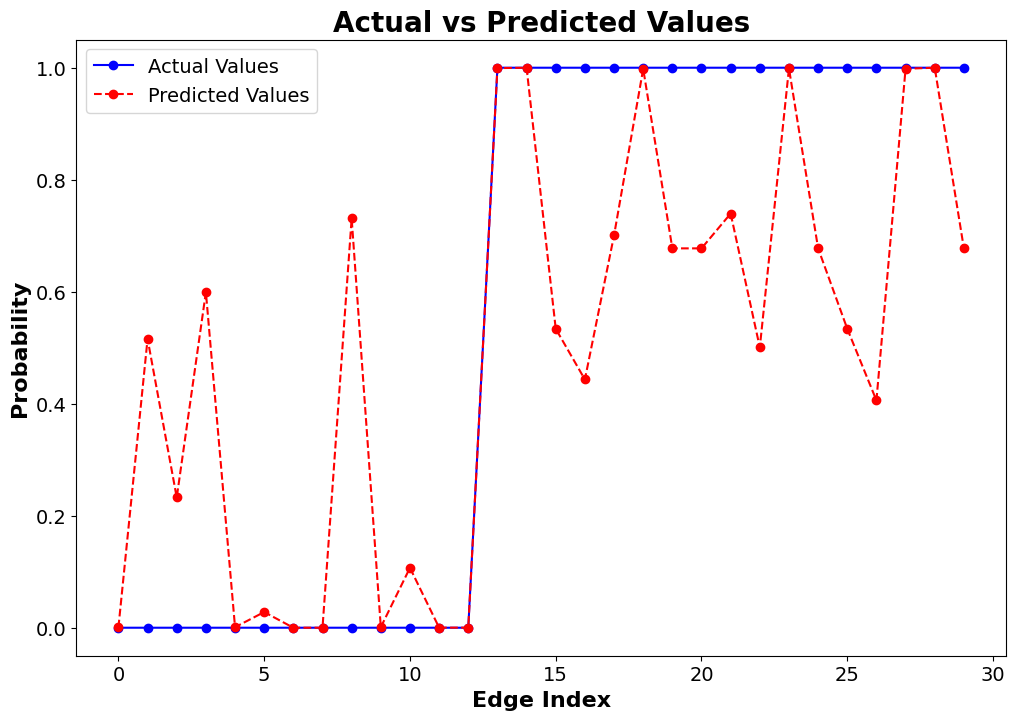

In [41]:
import matplotlib.pyplot as plt

# Assuming you have the prediction_df DataFrame with columns ["Source", "Target", "Predicted Probability", "True Label"]

# Sort the DataFrame by True Label to visualize better
prediction_df = prediction_df.sort_values(by="True Label").reset_index(drop=True)

# Create the figure and axis with increased size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot actual values
ax.plot(prediction_df.index, prediction_df["True Label"], label='Actual Values', color='blue', marker='o', linestyle='-')

# Plot predicted values
ax.plot(prediction_df.index, prediction_df["Predicted Probability"], label='Predicted Values', color='red', marker='o', linestyle='--')

# Add title and labels with bold and larger font
ax.set_title('Actual vs Predicted Values', fontsize=20, fontweight='bold')
ax.set_xlabel('Edge Index', fontsize=16, fontweight='bold')
ax.set_ylabel('Probability', fontsize=16, fontweight='bold')

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=14)

# Add legend with bold font
ax.legend(loc='upper left', fontsize=14, frameon=True)

# Save the plot as an image
plt.savefig('actual_vs_predicted.png')

# Show the plot
plt.show()


Number of high probability edges: 1435
High probability edges: [(0, 61), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 17), (6, 18), (6, 19), (6, 20), (6, 21), (6, 22), (6, 23), (6, 25), (6, 26), (6, 27), (6, 28), (6, 29), (6, 30), (6, 31), (6, 32), (6, 33), (6, 34), (6, 35), (6, 36), (6, 37), (6, 38), (6, 39), (6, 40), (6, 41), (6, 43), (6, 44), (6, 45), (6, 47), (6, 50), (6, 51), (6, 52), (6, 53), (6, 54), (6, 55), (6, 56), (6, 57), (6, 58), (6, 59), (6, 60), (6, 61), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 9), (8, 10), (8, 11), (8, 12), (8, 17), (8, 18), (8, 19), (8, 20), (8, 21), (8, 22), (8, 23), (8, 25), (8, 26), (8, 27), (8, 28), (8, 29), (8, 30), (8, 31), (8, 32), (8, 33), (8, 34), (8, 35), (8, 36), (8, 37), (8, 38), (8, 39), (8, 40), (8, 41), (8, 43), (8, 44), (8, 45), (8, 46), (8, 47), (8, 50), (8, 51), (8, 52), (8, 53), (8, 54), (8, 55), (8, 56), (8, 57), (8, 58), (8, 59), (8, 60), (8, 61), (12, 0),

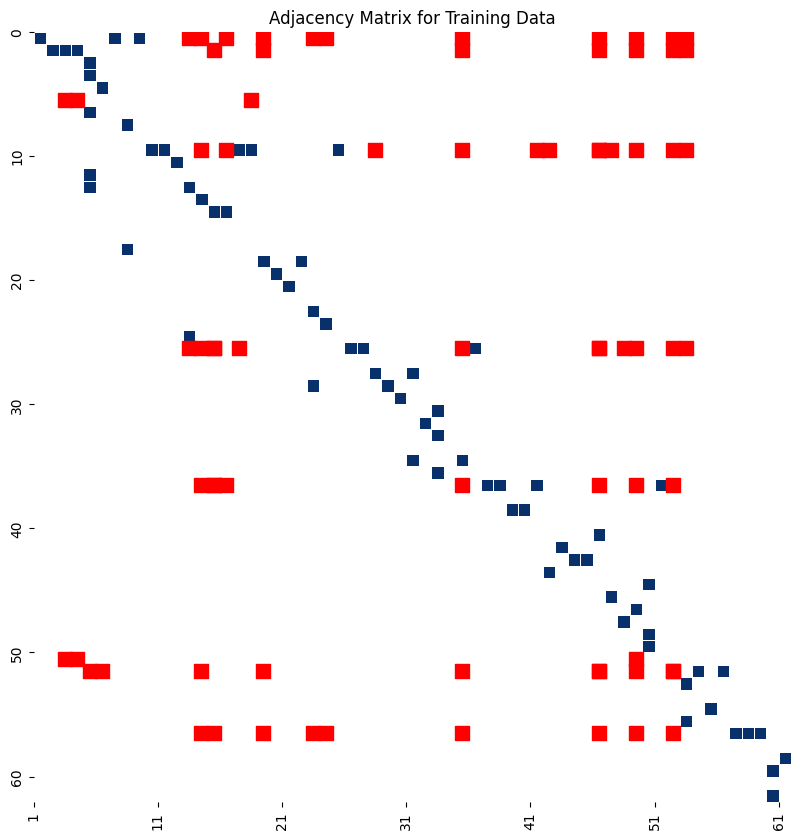

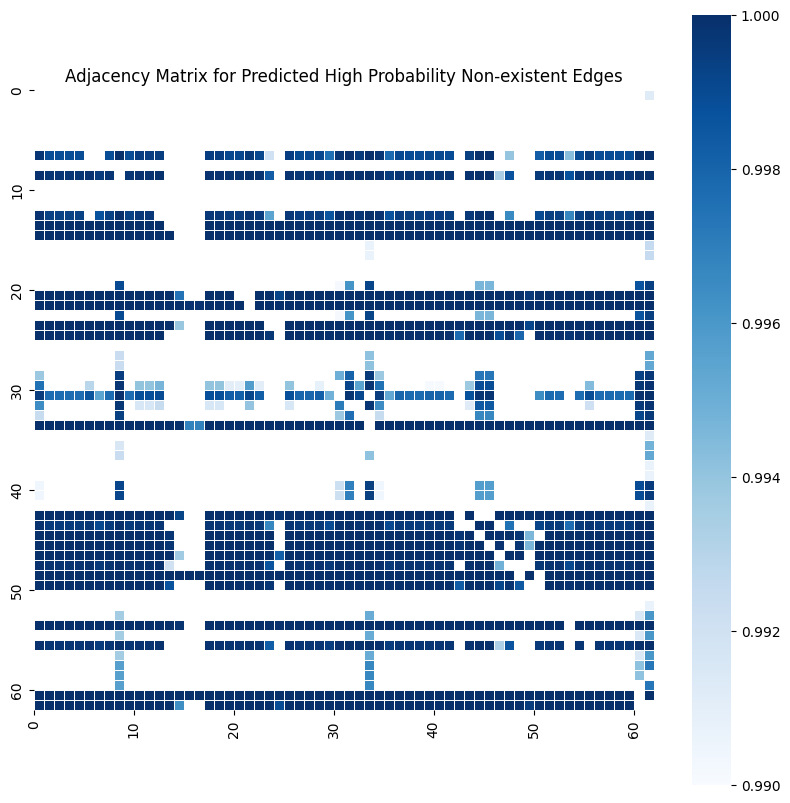

In [42]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming nodes is a dictionary where keys are node names and values are node features
node_names = list(nodes.keys())
num_nodes = len(node_names)

# Create an adjacency matrix for training data
def create_adjacency_matrix(edges, num_nodes, infeasible_edges=None, weights=None):
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=float)
    infeasible_positions = []
    for i, edge in enumerate(edges):
        src_node, dst_node = edge
        if weights is not None:
            adjacency_matrix[src_node, dst_node] = weights[i]
        else:
            adjacency_matrix[src_node, dst_node] = 1
        if infeasible_edges and edge in infeasible_edges:
            infeasible_positions.append((src_node, dst_node))
    return adjacency_matrix, infeasible_positions

# Prepare edges for the training data (positive and infeasible edges)
positive_edges = [(src, dst) for src, dst in positive_edges]
infeasible_edges = [(src.item(), dst.item()) for src, dst in infeasible_edges_tensor]

# Create adjacency matrices
training_edges = positive_edges + infeasible_edges
adj_matrix_training, infeasible_positions_training = create_adjacency_matrix(training_edges, num_nodes, infeasible_edges=infeasible_edges)

# Generate non-existent edges and their predictions
non_existent_edges = generate_non_existent_edges(nodes, edges)
non_existent_edges_indices = [(node_names.index(src), node_names.index(dst)) for src, dst in non_existent_edges]
non_existent_edges_tensor = torch.tensor(non_existent_edges_indices, dtype=torch.long)

# Predict for non-existent edges
model.eval()
with torch.no_grad():
    h = model(g, g.ndata['feat'])
    non_existent_scores = torch.sigmoid(model.compute_edge_scores(non_existent_edges_tensor, h))

# Filter non-existent edges with high probabilities
threshold = 0.99
predicted_high_prob_edges = []
predicted_high_prob_weights = []
for i in range(len(non_existent_edges_tensor)):
    score = non_existent_scores[i].item()
    if score > threshold:
        src_idx = non_existent_edges_tensor[i, 0].item()
        dst_idx = non_existent_edges_tensor[i, 1].item()
        predicted_high_prob_edges.append((src_idx, dst_idx))
        predicted_high_prob_weights.append(score)

# Print statements for diagnostics
print(f"Number of high probability edges: {len(predicted_high_prob_edges)}")
print(f"High probability edges: {predicted_high_prob_edges}")

# Create adjacency matrix for predicted non-existent edges
adj_matrix_predicted, infeasible_positions_predicted = create_adjacency_matrix(predicted_high_prob_edges, num_nodes, weights=predicted_high_prob_weights)

# Function to plot the adjacency matrix with node numbers
def plot_adjacency_matrix(adj_matrix, infeasible_positions, title, show_cbar=True):
    # Find the rows and columns where edges exist
    rows, cols = np.where(adj_matrix > 0)
    if len(rows) == 0 or len(cols) == 0:
        print(f"No edges found in {title}")
        return
    
    # Extract the submatrix
    min_row, max_row = rows.min(), rows.max()
    min_col, max_col = cols.min(), cols.max()
    submatrix = adj_matrix[min_row:max_row+1, min_col:max_col+1]
    
    plt.figure(figsize=(10, 10))
    mask = submatrix == 0  # Mask for zero values to leave them blank
    sns.heatmap(submatrix, cmap='Blues', annot=False, cbar=show_cbar, linewidths=.5, square=True, mask=mask,
                vmin=threshold, vmax=1)  # Adjust vmin and vmax for color intensity
    
    # Add square markers for infeasible edges
    for (i, j) in infeasible_positions:
        if min_row <= i <= max_row and min_col <= j <= max_col:
            plt.scatter(j - min_col + 0.5, i - min_row + 0.5, s=100, c='red', marker='s')
    
    plt.xticks(ticks=np.arange(submatrix.shape[1]) + 0.5, labels=np.arange(min_col, max_col + 1), rotation=90)
    plt.yticks(ticks=np.arange(submatrix.shape[0]) + 0.5, labels=np.arange(min_row, max_row + 1))
    plt.title(title)
    
    # Display labels every 10 digits
    plt.xticks(np.arange(0, submatrix.shape[1], 10), np.arange(min_col, max_col + 1, 10))
    plt.yticks(np.arange(0, submatrix.shape[0], 10), np.arange(min_row, max_row + 1, 10))
    
    plt.show()

# Plot the adjacency matrices
plot_adjacency_matrix(adj_matrix_training, infeasible_positions_training, "Adjacency Matrix for Training Data", show_cbar=False)
plot_adjacency_matrix(adj_matrix_predicted, infeasible_positions_predicted, "Adjacency Matrix for Predicted High Probability Non-existent Edges", show_cbar=True)
